# Guia de Uso do Modulo `PhaCircuits` para Análise e Desenho de Circuitos Elétricos

Este guia fornece um passo a passo sobre como usar a classe `Circuito` para adicionar componentes, definir nós, resolver e desenhar um circuito elétrico. Vamos explorar cada etapa detalhadamente, incluindo o código necessário e explicações sobre o que está sendo feito.


In [1]:
# Verifica se está rodando no Colab
if 'google.colab' in str(get_ipython()):
    # Clona o repositório do GitHub com a branch "main"
    !git clone -b main https://github.com/ygordealmeida/PhaCircuits
    # Acessa o diretório do projeto clonado
    from os import chdir as cd
    cd('/content/PhaCircuits/')
    # Instala o pacote com o pip
    !pip install .


Cloning into 'PhaCircuits'...
remote: Enumerating objects: 158, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 158 (delta 55), reused 135 (delta 45), pack-reused 0 (from 0)
Receiving objects: 100% (158/158), 362.51 KiB | 3.33 MiB/s, done.
Resolving deltas: 100% (55/55), done.
Processing /content/PhaCircuits
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.9/131.9 kB 2.3 MB/s eta 0:00:00
  Created wheel for PhaCircuits: filename=PhaCircuits-0.1-py3-none-any.whl size=3964 sha256=4e570bfe0afae841654a2ed79a0ae77744ec11042854172e5fac390250065a7f
  Stored in directory: /tmp/pip-ephem-wheel-cache-80ojt14l/wheels/50/7b/0c/a8e6b3ff785737a2c861152d75345c989cfcd145ca4a91e018
Successfully built PhaCircuits


## Importar Bibliotecas
Antes de começar, importe as bibliotecas que serão utilizadas. Essas bibliotecas são essenciais para o desenho e manipulação de componentes no circuito.


In [2]:
import schemdraw
import numpy as np
from math import atan
from PhaCircuits import Circuit
import cmath


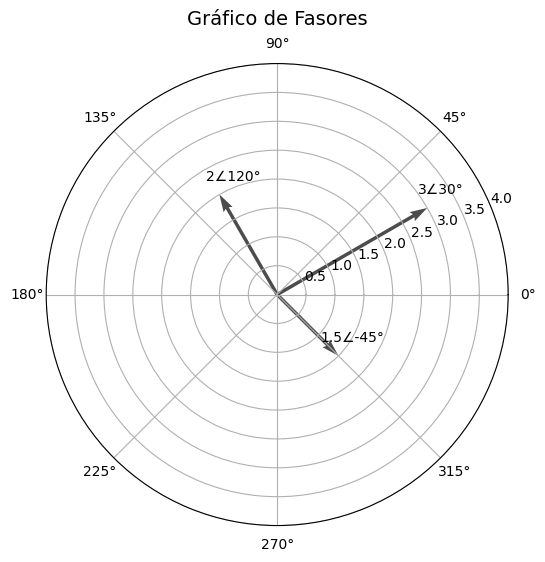

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Lista de fasores representados por módulo e ângulo (em graus)
fasores = [
    {"magnitude": 3, "angle_deg": 30},
    {"magnitude": 2, "angle_deg": 120},
    {"magnitude": 1.5, "angle_deg": -45},
]

# Configurando o gráfico
plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1, polar=True)

# Plotando cada fasor
for fasor in fasores:
    magnitude = fasor["magnitude"]
    angle_rad = np.radians(fasor["angle_deg"])
    ax.quiver(0, 0, angle_rad, magnitude, angles='xy', scale_units='xy', scale=1, alpha=0.7)

    # Anotação do fasor
    ax.annotate(f"{magnitude}∠{fasor['angle_deg']}°",
                xy=(angle_rad, magnitude),
                textcoords="offset points",
                xytext=(10, 10),
                ha='center', fontsize=10)

# Ajustes do gráfico
ax.set_ylim(0, max(f["magnitude"] for f in fasores) + 1)  # Ajuste do limite radial
ax.set_title("Gráfico de Fasores", va='bottom', fontsize=14)

# Exibindo o gráfico
plt.show()


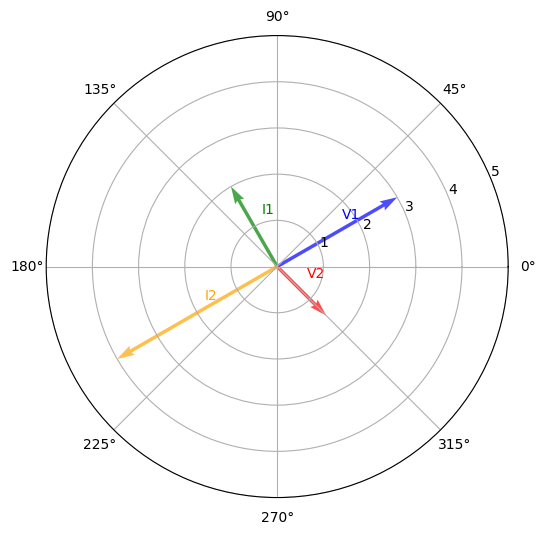

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Lista de fasores com magnitude, ângulo e nome (label)
fasores = [
    {"magnitude": 3, "angle_deg": 30, "label": "V1"},
    {"magnitude": 2, "angle_deg": 120, "label": "I1"},
    {"magnitude": 1.5, "angle_deg": -45, "label": "V2"},
    {"magnitude": 4, "angle_deg": 210, "label": "I2"},
]

# Lista de cores para as setas
cores = ["blue", "green", "red", "orange", "purple"]

# Configurando o gráfico
plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1, polar=True)

# Removendo o plano polar (grade e eixos)


# Plotando cada fasor com cor e rótulo
for i, fasor in enumerate(fasores):
    magnitude = fasor["magnitude"]
    angle_rad = np.radians(fasor["angle_deg"])
    label = fasor["label"]
    cor = cores[i % len(cores)]  # Cores se repetem se necessário

    # Desenhando a seta
    ax.quiver(0, 0, angle_rad, magnitude, angles='xy', scale_units='xy', scale=1, color=cor, alpha=0.7)

    # Adicionando o rótulo próximo à seta (ajustável)
    ax.annotate(label,
                xy=(angle_rad, magnitude / 2),  # Posicionar o texto no corpo da seta
                textcoords="offset points",
                xytext=(10, 10),  # Ajuste da posição do texto
                ha='center', fontsize=10, color=cor)

# Ajustes do gráfico (limites e proporção)
ax.set_ylim(0, max(f["magnitude"] for f in fasores) + 1)

# Exibindo o gráfico
plt.show()


In [20]:
#The time window needs be modified according the frequency

import numpy as np
import matplotlib.pyplot as plt

def plot_signal_from_phasors(phasors, frequency, duration=10, sampling_rate=1000):
    """
    Plota os sinais temporais de uma lista de fasores.

    Parâmetros:
        phasors (list): Lista de dicionários contendo "magnitude", "angle_deg", e "label".
        frequency (float): Frequência em Hz.
        duration (float): Duração do sinal em segundos (default: 1 segundo).
        sampling_rate (int): Taxa de amostragem em Hz (default: 1000 Hz).
    """
    # Vetor de tempo
    t= np.linspace(0,10,1000)
    t = np.linspace(0, duration, int(sampling_rate * duration))

    plt.figure(figsize=(10, 6))

    # Iterar sobre os fasores e calcular o sinal temporal
    for phasor in phasors:
        magnitude = phasor["magnitude"]
        angle_rad = np.radians(phasor["angle_deg"])
        label = phasor["label"]

        # Sinal no tempo: M * cos(2 * pi * f * t + theta)
        signal = magnitude * np.cos(2 * np.pi * frequency * t + angle_rad)

        # Plotar o sinal
        plt.plot(t, signal, label=f"{label} ({magnitude}∠{phasor['angle_deg']}°)")

    # Configurações do gráfico
    plt.title(f"Sinais Temporais para {frequency} Hz", fontsize=14)
    plt.xlabel("Tempo (s)", fontsize=12)
    plt.ylabel("Amplitude", fontsize=12)
    plt.grid(True)
    plt.legend(fontsize=10)
    plt.tight_layout()

    # Exibir o gráfico
    plt.show()


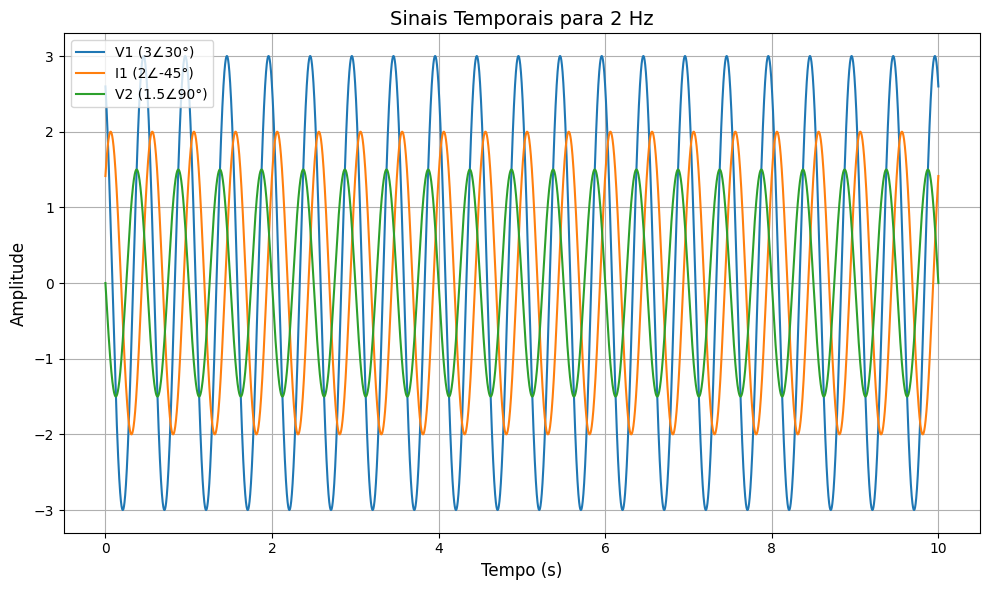

In [22]:
# Definição dos fasores
phasors = [
    {"magnitude": 3, "angle_deg": 30, "label": "V1"},
    {"magnitude": 2, "angle_deg": -45, "label": "I1"},
    {"magnitude": 1.5, "angle_deg": 90, "label": "V2"},
]

# Frequência em Hz
frequency = 2  # 50 Hz

# Chamando a função para plotar os sinais
plot_signal_from_phasors(phasors, frequency)


## Passo 1: Inicializar o Circuito

Primeiro, criamos uma instância da classe `Circuit`, que inicializa a lista de componentes, o conjunto de nós e outras variáveis internas necessárias.




In [23]:
circuito = Circuit()



### Passo 2: Adicionar Elementos ao Circuito

Usamos o método `element` para adicionar componentes ao circuito. O método recebe o tipo do elemento (`'Resistor'`, `'Capacitor'`, `'Inductor'`, `'Voltage Source'`, `'Current Source'`, ou `'Wire'`), os pontos de início e fim, o valor e um rótulo para identificação.

### Exemplo:

Aqui vamos adicionar uma fonte de tensão e alguns componentes ao circuito:




In [24]:
circuito.element("Voltage Source", (0, -2), (0, 0), 12, 'Vs')  # Fonte de tensão de 12V
circuito.element("Resistor", (0, 0), (2, 0), 10, "R1")         # Resistor de 10 ohms
circuito.element("Capacitor", (2, 0), (4, 0), -15j, "C1")      # Capacitor com valor imaginário -15j
circuito.element("Current Source", (4, 0), (4, -2), 5+8j, 'Is')  # Fonte de corrente complexa
circuito.element("Wire", (4, -2), (2, -2))
circuito.element("Wire", (2, -2), (0, -2))
circuito.element("Inductor", (2, 0), (2, -2), 30j, "L2")  # Indutor com valor imaginário 30j




## Passo 3: Definir o Nó de Referência

Para resolver o circuito, definimos um nó de referência onde a tensão é zero. Por padrão, o nó 0 é a referência, mas podemos escolher outro com o método `set_reference`.




In [25]:
circuito.set_reference(4)  # Definindo o nó 4 como referência


## Passo 4: Desenhar o Circuito

Usamos o método `draw` para criar uma representação visual do circuito. Este método utiliza a biblioteca `schemdraw` para desenhar o circuito.




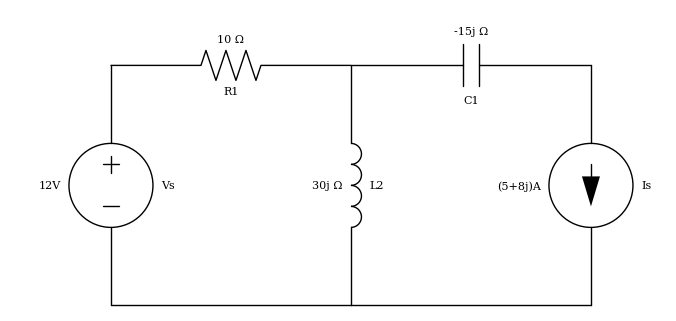

In [26]:
circuito.draw()  # Desenha o circuito sem mostrar as correntes


## Passo 5: Resolver o Circuito

Para calcular as tensões nos nós, usamos `resolver_circuito`, que monta a matriz de condutância e resolve as equações associadas.



In [27]:

V = circuito.solve_circuit()
print("Tensões nos nós:", V)

Mapeamento de nós: {(2, -2): 0, (4, 0): 1, (0, 0): 2, (2, 0): 3, (4, -2): 4, (0, -2): 5}
Tensões nos nós: [   0.   +0.j   -130.2  -8.4j    12.   +0.j    -10.2 -83.4j
    0.   +0.j      0.   +0.j     -2.22 -8.34j   -5.   -8.j
   -2.22 -8.34j]


## Passo 6: Exibir as Correntes nos Componentes

Após resolver o circuito, usamos `draw_with_currents` para desenhar o circuito mostrando as correntes em cada componente. Podemos especificar uma lista de rótulos para mostrar correntes específicas ou deixar o padrão para exibir todas.


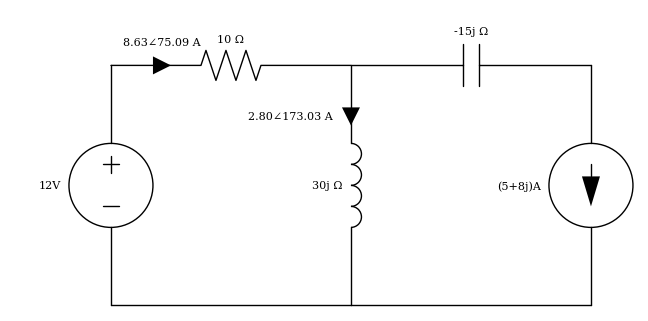

In [36]:
circuito.draw_with_currents(["R1","L2"])  # Desenha o circuito com correntes indicadas nos componentes